## Importa pacotes

In [1]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from numpy import where
from matplotlib import pyplot
from tensorflow import random
import numpy as np #Manipução de Arrays
from sklearn.preprocessing import OneHotEncoder

"""**Inicializando semente aleatoria**"""

seed = 123
np.random.seed(seed)
random.set_seed(seed)

## Gera os dados

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=1, random_state=12342)

## **NÃO PRECISA**

In [ ]:
y

In [ ]:
list(X.T[1])

In [ ]:
import pandas as pd

df = pd.DataFrame({'X0':X.T[0], 'X1':X.T[1], 'y':y})
df[df['y']==1].head(20)

In [ ]:
df

In [ ]:
list(range(10, 101, 5))

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [ ]:

for j in range(3):
  print(j)



0
1
2


In [ ]:
X

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

In [ ]:
where(y == 0)

(array([  3,   5,  11,  13,  14,  21,  22,  28,  30,  31,  35,  36,  39,
         45,  46,  49,  50,  52,  57,  61,  63,  64,  66,  69,  77,  81,
         84,  91,  93,  94,  97,  99, 107, 108, 110, 114, 115, 116, 117,
        120, 122, 124, 127, 129, 131, 132, 133, 135, 142, 146, 147, 153,
        155, 160, 164, 166, 173, 181, 188, 189, 190, 195, 208, 210, 214,
        216, 218, 223, 225, 227, 237, 240, 244, 245, 247, 250, 253, 255,
        259, 265, 267, 271, 272, 274, 276, 278, 279, 283, 285, 287, 293,
        297, 299, 301, 303, 304, 306, 308, 309, 315, 316, 320, 323, 324,
        327, 328, 329, 331, 332, 336, 341, 342, 345, 346, 349, 353, 355,
        357, 358, 359, 363, 367, 368, 369, 372, 373, 374, 379, 381, 387,
        393, 394, 396, 402, 409, 410, 416, 419, 423, 424, 425, 435, 436,
        439, 444, 445, 446, 447, 449, 450, 451, 452, 458, 464, 465, 469,
        471, 472, 475, 476, 477, 478, 480, 481, 484, 485, 486, 488, 490,
        496, 499, 500, 501, 502, 504, 505, 510, 512

## Plota os dados

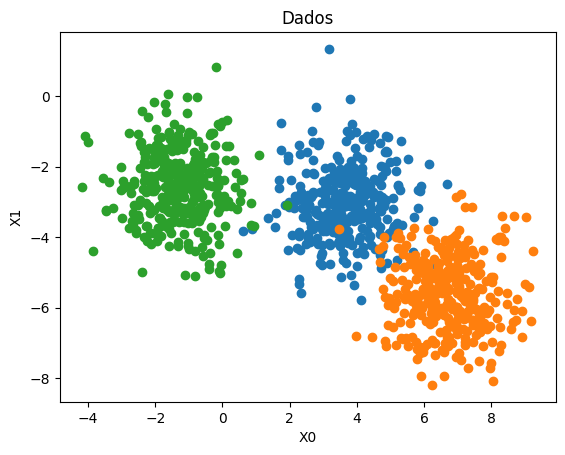

In [6]:
# select indices of points with each class label
for i in range(3):
  samples_ix = where(y == i)
  pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.xlabel('X0')
pyplot.ylabel('X1')
pyplot.title('Dados')
pyplot.show()

## **NÃO PRECISA**

In [10]:
y[:10]

array([1, 0, 2, 2, 2, 0, 2, 1, 0, 0])

In [9]:
# one hot encode output variable
yc = to_categorical(y)

In [11]:
yc[0:10]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
X[:10,]

array([[ 5.88708215, -7.10807998],
       [ 5.65685046, -4.41306331],
       [-0.03938184, -4.78432089],
       [-0.82982071, -4.39443887],
       [-1.68891764, -0.43923833],
       [ 2.70418769, -2.17057052],
       [-0.08015602, -3.16239163],
       [ 6.98422979, -4.58305055],
       [ 4.07790547, -2.13906264],
       [ 4.00735156, -1.68668439]])

## Split: treinamento, validação and teste

In [13]:
# split into train, validação and test
n_train = 600
trainX, validX, testX = X[:n_train, :], X[n_train:n_train+300, :], X[n_train+300:, :]
trainy, validy, testy = yc[:n_train], yc[n_train:n_train+300], yc[n_train+300:]

## Modelo da Rede

In [16]:
seed = 123
np.random.seed(seed)
random.set_seed(seed)

# Define model de Classificação
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Treinamento

In [17]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), batch_size = 32, epochs=300, verbose=1)

Epoch 1/300
19/19 [==============================] - 1s 10ms/step - loss: 0.9896 - accuracy: 0.6617 - val_loss: 0.8577 - val_accuracy: 0.6967
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 0.8209 - accuracy: 0.6533 - val_loss: 0.7390 - val_accuracy: 0.6867
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 0.7118 - accuracy: 0.6550 - val_loss: 0.6583 - val_accuracy: 0.6933
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.6667 - val_loss: 0.5986 - val_accuracy: 0.7167
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.6950 - val_loss: 0.5512 - val_accuracy: 0.7467
Epoch 6/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.7017 - val_loss: 0.5128 - val_accuracy: 0.7533
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7133 - val_loss: 0.4831 - val_accuracy: 0.7600
Epoch 8/300


## Verifica Acurácia

In [18]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, val_acc = model.evaluate(validX, validy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Valid: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

Train: 0.980, Valid: 0.983, Test: 0.970


## Aplica o modelo treinado

In [19]:
ytt = model.predict(testX)

4/4 [==============================] - 0s 2ms/step


In [22]:
ytt

array([[9.99687374e-01, 2.53882085e-04, 5.87039431e-05],
       [1.01415606e-06, 9.99998868e-01, 8.79425865e-09],
       [5.88035226e-01, 4.11671340e-01, 2.93340650e-04],
       [2.17632297e-02, 9.78146374e-01, 9.04217377e-05],
       [9.93582904e-01, 1.79031427e-04, 6.23802189e-03],
       [2.79747345e-03, 9.97189403e-01, 1.31156776e-05],
       [9.97530758e-01, 2.00811238e-03, 4.61184653e-04],
       [5.27446864e-05, 9.99947131e-01, 1.43394530e-07],
       [6.30127733e-21, 1.06470602e-14, 9.99999940e-01],
       [9.88974452e-01, 4.50186571e-03, 6.52368087e-03],
       [9.96088684e-01, 2.40275054e-03, 1.50855607e-03],
       [9.76811349e-01, 2.07619509e-04, 2.29809918e-02],
       [4.42286637e-06, 9.99995530e-01, 1.29076705e-08],
       [5.81751884e-26, 1.63819415e-16, 9.99999940e-01],
       [1.06025396e-25, 4.02050065e-16, 9.99999940e-01],
       [9.99353886e-01, 3.92973277e-04, 2.52987375e-04],
       [9.21676993e-01, 7.67157525e-02, 1.60711736e-03],
       [9.99791861e-01, 7.34847

In [23]:
# Convert predictions classes to one hot vectors 
i_ytt_m = np.argmax(ytt,axis = 1) 
i_ya_m = np.argmax(testy,axis = 1) 

In [24]:
i_ytt_m

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0])

## **NÃO PRECISA**

In [ ]:
# Convert predictions classes to one hot vectors 
i_ytt_m = np.argmax(ytt,axis = 1) 
i_ya_m = np.argmax(testy,axis = 1) 
a = 0
for i in range (500):
  #print(i_ya_m[i], ' ', i_ytt_m[i])
  if (i_ya_m[i]==i_ytt_m[i]):
    a = a + 1
print('Acertos = ', a)

for i in range (50):
  print(testy[i], ' ', i_ya_m[i], ' ', ytt[i], ' ', i_ytt_m[i])

## Plota histórico do treinamento

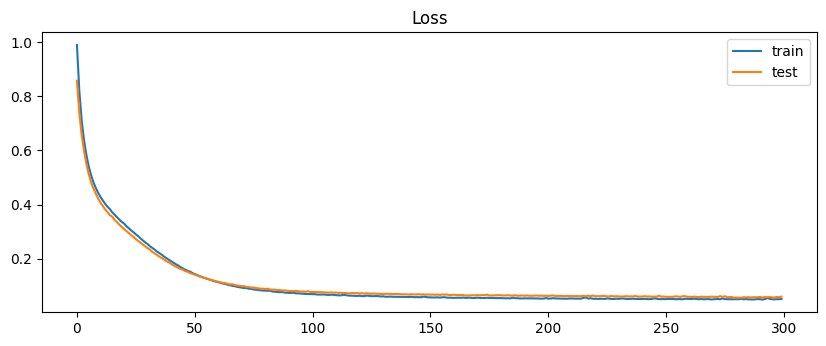

In [20]:
# plot loss during training
pyplot.figure(figsize=(10,8))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

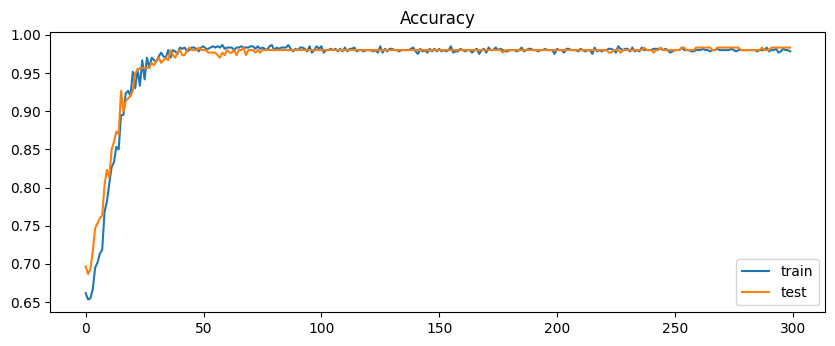

In [21]:
# plot accuracy during training
pyplot.figure(figsize=(10,8))
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Matriz de Confusão

In [25]:
# Convert predictions classes to one hot vectors 
i_ytt_m = np.argmax(ytt,axis = 1) 
i_ya_m = np.argmax(testy,axis = 1) 

In [28]:
tf.math.confusion_matrix(i_ya_m, i_ytt_m)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[42,  1,  0],
       [ 2, 26,  0],
       [ 0,  0, 29]], dtype=int32)>

tf.Tensor(
[[42  1  0]
 [ 2 26  0]
 [ 0  0 29]], shape=(3, 3), dtype=int32)


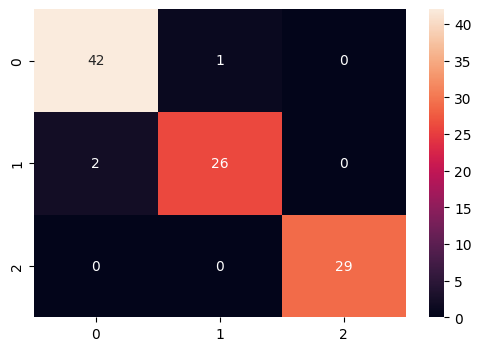

In [27]:
import tensorflow as tf
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(i_ya_m, i_ytt_m)
print(confusion_mtx)

pyplot.figure(figsize=(6, 4))

c = sns.heatmap(confusion_mtx, annot=True, fmt='g')

pyplot.show()